This notebook implements KNN algorithm from scratch without using scikit-learn

In [1]:
import pandas as pd
import numpy as np
import math
from collections import defaultdict
import operator
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/wookiee-train.csv', index_col = 0)

In [14]:
train_data;

In [3]:
test_data = pd.read_csv('data/wookiee-test.csv', index_col = 0)

In [4]:
def euclideanDist(x, xi):
    d = 0.0
    for i in range(len(x)):
        d += pow((float(x[i])-float(xi[i])),2)  #euclidean distance
    d = math.sqrt(d)
    return d

In [12]:
euclideanDist([4], [2])

2.0

In [5]:
train_data = train_data[:100]
test_data = test_data[:50]

In [16]:
#KNN prediction and model training
def knn_predict(test_data, train_data, k_value):
    ans = []
    for i in range(len(test_data)):
        eu_Distance =[]
        knn = []
        color_dict = defaultdict(int)
        
        for j in range(len(train_data)):
            eu_dist = euclideanDist(train_data.iloc[j,1:], test_data.iloc[i, 1:])
            eu_Distance.append((train_data.iloc[j, 0], eu_dist))
            eu_Distance.sort(key = operator.itemgetter(1))
            knn = eu_Distance[:k_value]
        for k in knn:
            if k[0] =='red':
                color_dict['red'] += 1

            elif k[0] == 'blue':
                color_dict['blue'] += 1

            if k[0] == 'white':
                color_dict['white'] += 1

            elif k[0] == 'chartreuse':
                color_dict['chartreuse'] +=1

        ans.append(max(color_dict.items(), key=operator.itemgetter(1))[0])
    
    return ans

In [15]:
y_pred

['red',
 'red',
 'chartreuse',
 'red',
 'blue',
 'red',
 'red',
 'white',
 'blue',
 'white',
 'blue',
 'white',
 'blue',
 'chartreuse',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'chartreuse',
 'white',
 'chartreuse',
 'white',
 'chartreuse',
 'white',
 'red',
 'blue',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white',
 'blue',
 'red',
 'white',
 'red',
 'white',
 'white',
 'white',
 'red',
 'red',
 'chartreuse',
 'white',
 'red']

In [17]:
y_pred = knn_predict(test_data, train_data, k_value = 5)
y_test = test_data.iloc[:, 0]

In [18]:
def accuracy(y_pred = y_pred, y_test = y_test):
    positive = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            positive += 1
    return positive/len(y_pred)*100

In [19]:
accuracy()

60.0

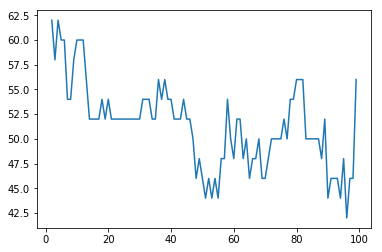

In [22]:
#Tuning K
acc_scores = []
k_values = list(range(2, 100))

for k_value in k_values:
    y_pred = knn_predict(test_data, train_data, k_value)
    acc_scores.append(accuracy(y_pred, y_test))
plt.plot(k_values, acc_scores)